Run in the terminal with `moveread-api --base-path data`

In [1]:
import requests
from rich import print
import pure_cv as vc
base = 'http://localhost:8000'

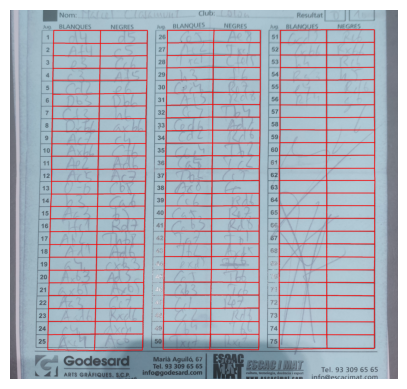

In [2]:
img = open('../.images/sheet0.jpg', 'rb').read()
r = requests.post(f'{base}/extract?model=fcde&descale_height=1496', files=[('sheet', img)])
res = r.json()
conts = res['value']['contours']
corr_img = vc.b64decode(res['value']['corrected_image'])
vc.show(vc.draw.contours(conts, corr_img))

In [3]:
gameId = 'new-game'
r = requests.post(f'{base}/games?id={gameId}', files=[('white', b'img1')])
print(r.status_code, r.json())

201
{
    'value': {
        'id': 'new-game',
        'players': [
            {
                'sheets': [{'images': [{'url': 'new-game/0-0-0', 'boxes': None, 'meta': None}], 'meta': None}],
                'meta': None
            }
        ],
        'meta': None
    },
    'tag': 'right'
}

In [5]:
r = requests.get(f'{base}/blobs/new-game/0-0-0.jpg')
print(r.status_code, r.text)

200 img1

In [9]:
r = requests.get(f'{base}/games?id={gameId}')
print(r.status_code, r.json())

200
{
    'value': {
        'id': 'new-game',
        'players': [
            {
                'sheets': [{'images': [{'url': 'new-game/0-0-0', 'boxes': None, 'meta': None}], 'meta': None}],
                'meta': None
            }
        ],
        'meta': None
    },
    'tag': 'right'
}

In [10]:
game = r.json()['value']
game['meta'] = dict(pgn='e4 e5')
r = requests.put(f'{base}/games?id={gameId}', json=game)
print(r.status_code, r.json())

200
{'value': None, 'tag': 'right'}

In [29]:
r = requests.put(f'{base}/images/annotate?gameId={gameId}&player=0&page=0&version=0&schema=source', json={})
print(r.status_code, r.json())

500
{
    'value': {
        'detail': "1 validation error for RootModel[Literal['raw-scan', 'corrected-scan', 'camera', 
'corrected-camera']]\n  Input should be 'raw-scan', 'corrected-scan', 'camera' or 'corrected-camera' 
[type=literal_error, input_value={}, input_type=dict]\n    For further information visit 
https://errors.pydantic.dev/2.6/v/literal_error",
        'reason': 'invalid-data'
    },
    'tag': 'left'
}